In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key
#install citypy
#pip install citipy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [7]:
#MAKING CITY LIST

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [31]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


In [32]:
# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d579347dc450cf24076482466e35533&q=port%20elizabeth
City not found. Skipping...
Processing Record 2 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d579347dc450cf24076482466e35533&q=sao%20joao%20da%20barra
Processing Record 3 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d579347dc450cf24076482466e35533&q=pevek
City not found. Skipping...
Processing Record 4 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d579347dc450cf24076482466e35533&q=touros
Processing Record 5 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d579347dc450cf24076482466e35533&q=pacific%20grove
Processing Record 6 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d579347dc450cf240764

In [10]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [14]:
# Save data frame to CSV
weather_data.to_csv('output_csv/weather_data.csv')

# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Elizabeth,1,US,1562173201,55,39.31,-74.98,91.00,5.82
1,Sao Joao da Barra,0,BR,1562173204,40,-21.64,-41.05,87.80,6.93
2,Pevek,100,RU,1562173206,99,69.70,170.27,33.02,6.82
3,Touros,75,BR,1562173208,74,-5.20,-35.46,82.40,13.87
4,Pacific Grove,90,US,1562173104,72,36.62,-121.92,63.00,9.44


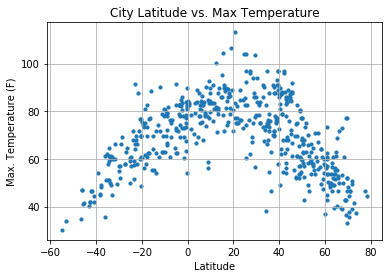

In [19]:
#Latitude vs. Temperature Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output-png/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

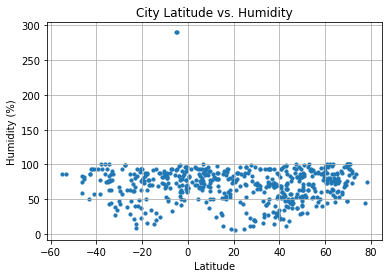

In [22]:
#Latitude vs. Humidity Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output-png/Humidity_vs_Latitude.png")

# Show plot
plt.show()


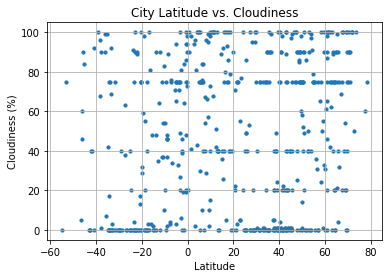

In [24]:
#Latitude vs. Cloudiness Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output-png/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

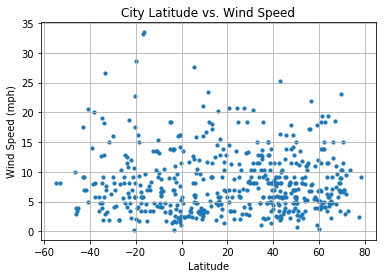

In [25]:
#Latitude vs. Wind Speed Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output-png/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()